# Title

## Objectives: 
1. Choose a real-world phenomenon that can be measured.
2. Investigate the types of variables involved, their likely distributions, and their
relationships with each other, accross at least 4 variables.
3. Synthesise/simulate a data set as closely matching their properties as possible.


<br>

## Real World Phenomenon
***

### Hypertension
This project will explore *hypertension*, which is more commonly known as high blood pressure. This real world problem can result in stroke, heart<br>
disease and heart attacks. Blood pressure is measured using systolic blood pressure which measures the pressure in ones arteries when their heart<br>
beats, and diastolic blood pressure which measures the pressure in ones artetries between heart beats [1]. The Centers for Disease Control and<br>
Prevention defines hypertension as a systolic reading of ≥ 130 mmHg and/or a diastolic reading of ≥ 80 mmHg.



<br>

## Investigating the Variables
***
### Selection:
Justin et al.(2013) detail how 467 abstracts related to hypertension were closely examined and how 11 articles of 467 were indentified that explored<br>
linear regression prediction models with incident hypertension as their outcome of interest. The results of these articles showed  that the best predictor<br>
variables for hypertension were age, sex, body mass index, diabetes status, parental hypertension, smoking and systolic/diastolic blood pressure. 

The variables described in table 1 will be selected to model a hypertension dataset and the variable types are also declared, these will play an imortant <br>
partin modelling the data.


<br>

<table style = 'float : left;'>
<tr><th>Table 1: Variable Summary</th>
<tr><td>

|Variable Type| Variable |Units|
|:--:|:--:|:--:|
|Continuous|Systolic Blood Pressure (BPs) |[mmHg]|
|Continuous|Diastolic Blood Pressure (BPd)|[mmHg]|
|Continuous|BMI|[kg/m²]|
|Discrete|Age|Years|
|Categorical|Sex |-|
|Categorical|Smoker|-|

</td></tr> </table>

In [1]:
#Table 1 wil be useful for deducing incident rate to evaluate most important variables to model.
## https://www.ahajournals.org/doi/10.1161/HYPERTENSIONAHA.120.16354

# gives dist tables (not for each sex, doesnt do correlation stats)
#https://www.hindawi.com/journals/ijhy/2018/4186496/

## looks at dist tables for age, weight, height, bmi, heart rate in young greek adults, also does lienar regression etc....
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/


## Assumptions for pearsons correlation etc....(needs to be normally dist....use spearman if not)
# https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx

## Bivariate normal distributed is important for pearsons......
# https://www.statisticshowto.com/bivariate-normal-distribution/
#hist / scatter overlap regplot i think shows this 

### Distribution:

### Correlation:

Importance of drawing samples from distribution, as mean and std dev alone can not determine an accurate distribution
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet

# parental hypertension

# link to paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/
# # Normality of variables distribution was checked and found satisfactorily


# what variables are important for each variables .... how are they related?....

 - Continuous:
    - Systolic Blood Pressure (BPs) [mmHg]
    - Diastolic Blood Pressure (BPd) [mmHg] 
    - BMI [kg/m²]<br><br>
    
- Discrete:
    - Body Fat [%]
    - Age [Years]

<table style = 'float : left;'>
<tr><th>Male Statistics </th><th>Female Statistics</th></tr>
<tr><td>

|Variable| Mean | Std Dev|
|--|--|--|
|BPs [mmHg]|133.1| 17.0|
|BPd [mmHg]|82.5 | 11.6|
|Age [years]|46.1|16.6|
|Body Fat [%]|23.2|7.0 |
|BMI [kg/m²]|26.8|3.9|

</td><td>

| Mean | Std Dev|
|--|--|
|127.7| 17.5|
|78.5 | 10.6|
|45.4|15.4|
|29.4|8.3|
|24.8|4.6|

</td></tr> </table>

## Simulating The Dataset

In [2]:
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting
import numpy as np                          # for numeric processing (from different distributions)
import pandas as pd                         # to generate dataframes & manipulat data

plt.rcParams['font.size'] = 13              # set default plot font size 
plt.rcParams["figure.figsize"] = (10, 6)    # set default figure font size 

In [3]:
def generate_multivariate_normal(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]    
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    
    print('variances are: {}'.format(variances))
    print('covariances are: {}'.format(covariance))
    print('covariance_matrix is: {}'.format(covariance_matrix))
    return array

             age_corr  BPs_corr  BPd_corr  Height_corr     Fat %    Weight  \
age_corr     1.000000  0.462665  0.333445    -0.235553  0.629607  0.360823   
BPs_corr     0.462665  1.000000  0.700897    -0.001053  0.392250  0.367582   
BPd_corr     0.333445  0.700897  1.000000     0.026900  0.315655  0.354807   
Height_corr -0.235553 -0.001053  0.026900     1.000000 -0.254878  0.190398   
Fat %        0.629607  0.392250  0.315655    -0.254878  1.000000  0.730748   
Weight       0.360823  0.367582  0.354807     0.190398  0.730748  1.000000   
BMI          0.439825  0.366473  0.341676    -0.168187  0.808243  0.910485   

                  BMI  
age_corr     0.439825  
BPs_corr     0.366473  
BPd_corr     0.341676  
Height_corr -0.168187  
Fat %        0.808243  
Weight       0.910485  
BMI          1.000000  


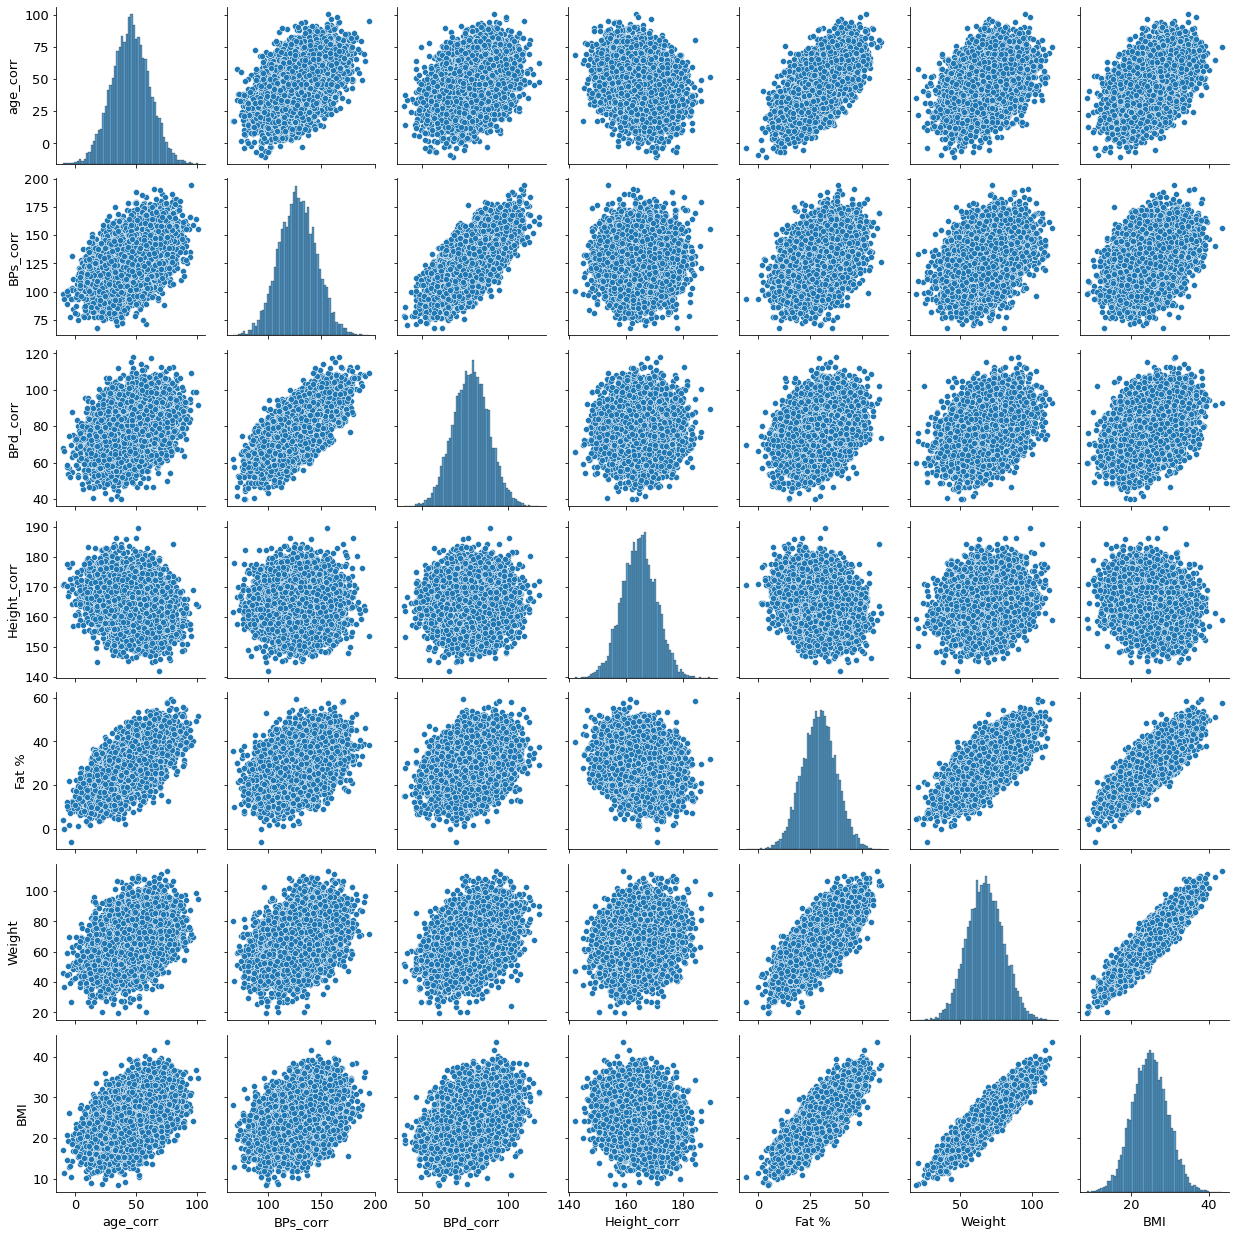

In [39]:


mean = (45.4, 127.7, 78.5, 164.7, 29.4, 67.3, 24.8)
stdDev = (15.4, 17.5, 10.6, 6.1, 8.3, 12.8, 4.6)

var_age = 15.4**2
var_bps = 17.5**2
var_bpd = 10.6**2
var_height = 6.1**2
var_fat = 8.3**2
var_weight = 12.8**2
var_bmi = 4.6 ** 2

# covariance = pearsons corr. * (product of std devs)
    # note: std_dev = sqrt of variance  
cov_bpd_bps = 0.7 * np.sqrt(var_bpd * var_bps)
cov_age_bps = 0.46 * np.sqrt(var_age * var_bps)
cov_age_bpd = 0.33 * np.sqrt(var_age * var_bpd)

cov_height_age = -0.23 * np.sqrt(var_height * var_age)
cov_height_bps =  0 * np.sqrt(var_height * var_bps)
cov_height_bpd =  0.02 * np.sqrt(var_height * var_bpd)

cov_fat_age = 0.63 * np.sqrt(var_fat * var_age)
cov_fat_bps = 0.39 * np.sqrt(var_fat * var_bps)
cov_fat_bpd = 0.32 * np.sqrt(var_fat * var_bpd)
cov_fat_height = -0.25 * np.sqrt(var_fat * var_height)

cov_weight_age = 0.36 * np.sqrt(var_weight * var_age)
cov_weight_bps = 0.37 * np.sqrt(var_weight * var_bps)
cov_weight_bpd = 0.36 * np.sqrt(var_weight * var_bpd)
cov_weight_height = 0.20 * np.sqrt(var_weight * var_height)
cov_weight_fat = 0.73 * np.sqrt(var_weight * var_fat)

cov_bmi_age = 0.44 * np.sqrt(var_bmi * var_age)
cov_bmi_bps = 0.37 * np.sqrt(var_bmi * var_bps)
cov_bmi_bpd = 0.35 * np.sqrt(var_bmi * var_bpd)
cov_bmi_height = -0.16 * np.sqrt(var_bmi * var_height)
cov_bmi_fat = 0.81 * np.sqrt(var_bmi * var_fat)
cov_bmi_weight = 0.91 * np.sqrt(var_bmi * var_weight)


# This is a covariance matrix that will be fed into the random.multivariate_normal to correlate the data
# Performing this action was justified as all variables follow a normal distribution

#                 Age              BPs              BPd              Height               # Fat %           # weight               # BMI
cov_matrix =  [[var_age,        cov_age_bps,     cov_age_bpd,      cov_height_age,    cov_fat_age,     cov_weight_age,    cov_bmi_age   ],    # age
              [cov_age_bps,       var_bps,       cov_bpd_bps,      cov_height_bps,    cov_fat_bps,     cov_weight_bps,    cov_bmi_bps   ],    # BPs
              [cov_age_bpd,     cov_bpd_bps,       var_bpd,        cov_height_bpd,    cov_fat_bpd,     cov_weight_bpd,    cov_bmi_bpd   ],    # BPd 
              [cov_height_age,  cov_height_bps,  cov_height_bpd,     var_height,      cov_fat_height,  cov_weight_height, cov_bmi_height],    # height 
              [cov_fat_age,     cov_fat_bps,     cov_fat_bpd,      cov_fat_height ,      var_fat,      cov_weight_fat,    cov_bmi_fat   ],    # Fat %
              [cov_weight_age,  cov_weight_bps,  cov_weight_bpd,   cov_weight_height, cov_weight_fat,    var_weight,      cov_bmi_weight],    # weight             
              [cov_bmi_age,     cov_bmi_bps,     cov_bmi_bpd,      cov_bmi_height,    cov_bmi_fat,     cov_bmi_weight,        var_bmi   ]]    # BMI
 
multi2 = np.random.multivariate_normal(mean, cov_matrix, (10000), check_valid = 'warn') 
normal2 = np.random.normal(mean, stdDev, (1000, 8))


dict = { 'age_corr' : multi2[:,0], 'BPs_corr' : multi2[:,1], 'BPd_corr' : multi2[:,2], 'Height_corr' : multi2[:,3], 'Fat %' : multi2[:,4], 'Weight' : multi2[:,5], 'BMI' : multi2[:,6]}
df = pd.DataFrame(dict)

print(df2.corr())
sns.pairplot(df2)

In [33]:
'''
fig, ax = plt.subplots(4, 3, sharex = True, sharey = False, figsize = (15, 15))

ax[0, 0].hist(multi2[:,0])
ax[0, 1].hist(multi2[:,1])           
ax[0, 2].hist(multi2[:,2])

ax[1, 0].scatter(multi2[:,0], multi2[:,1])
ax[1, 1].scatter(multi2[:,1], multi2[:,2])
ax[1, 2].scatter(multi2[:,0], multi2[:,2])


ax[2, 0].hist(normal2[:,0])
ax[2, 1].hist(normal2[:,1])
ax[2, 2].hist(normal2[:,2])

ax[3, 0].scatter(normal2[:,0], normal2[:,1])
ax[3, 1].scatter(normal2[:,1], normal2[:,2])
ax[3, 2].scatter(normal2[:,0], normal2[:,2])
plt.show()
'''
print('The Standard Dev of Age Cov = {}'.format(np.std(multi2[:,0])))
print('The Standard Dev of BPs Cov = {}'.format(np.std(multi2[:,1])))
print('The Standard Dev of BPd Cov = {}'.format(np.std(multi2[:,2])))

print('The Standard Dev of Age norm = {}'.format(np.std(normal2[:,0])))
print('The Standard Dev of BPs norm = {}'.format(np.std(normal2[:,1])))
print('The Standard Dev of BPd norm = {}'.format(np.std(normal2[:,2])))


print('The mean of Age Cov = {}'.format(np.mean(multi2[:,0])))
print('The mean of BPs Cov = {}'.format(np.mean(multi2[:,1])))
print('The mean of BPd Cov = {}'.format(np.mean(multi2[:,2])))

print('The mean of Age norm = {}'.format(np.mean(normal2[:,0])))
print('The mean of BPs norm = {}'.format(np.mean(normal2[:,1])))
print('The mean of BPd norm = {}'.format(np.mean(normal2[:,2])))

The Standard Dev of Age Cov = 15.758772712625596
The Standard Dev of BPs Cov = 18.316705154844225
The Standard Dev of BPd Cov = 11.005153915002907
The Standard Dev of Age norm = 15.638569509318078
The Standard Dev of BPs norm = 17.97189386529766
The Standard Dev of BPd norm = 10.998868986407771
The mean of Age Cov = 44.93753131786782
The mean of BPs Cov = 127.52774976094972
The mean of BPd Cov = 78.56014783507618
The mean of Age norm = 45.385667540187406
The mean of BPs norm = 126.87701056610268
The mean of BPd norm = 78.7837105532002


In [4]:
def test(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]  
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    return array

In [5]:
# male array formation
# element order: BPs, BPd, Age, fat%, BMI
#means = {'Male' :[133.1, 82.5, 46.1, 23.2, 26.8], 'Female': [127.7, 78.5, 45.4, 29.4, 24.8]}  
#std_devs = {'Male' :[17.0, 11.6, 16.6, 7.0, 3.9], 'Female': [17.5, 10.6, 15.4, 8.3, 4.6]}  


#corr_coeff = 0.5
#num_samples = 120

#male_weight_vs_fat = generate_multivariate_normal(means, std_devs, corr_coeff, num_samples)
#male_gender = np.repeat('Male', num_samples)

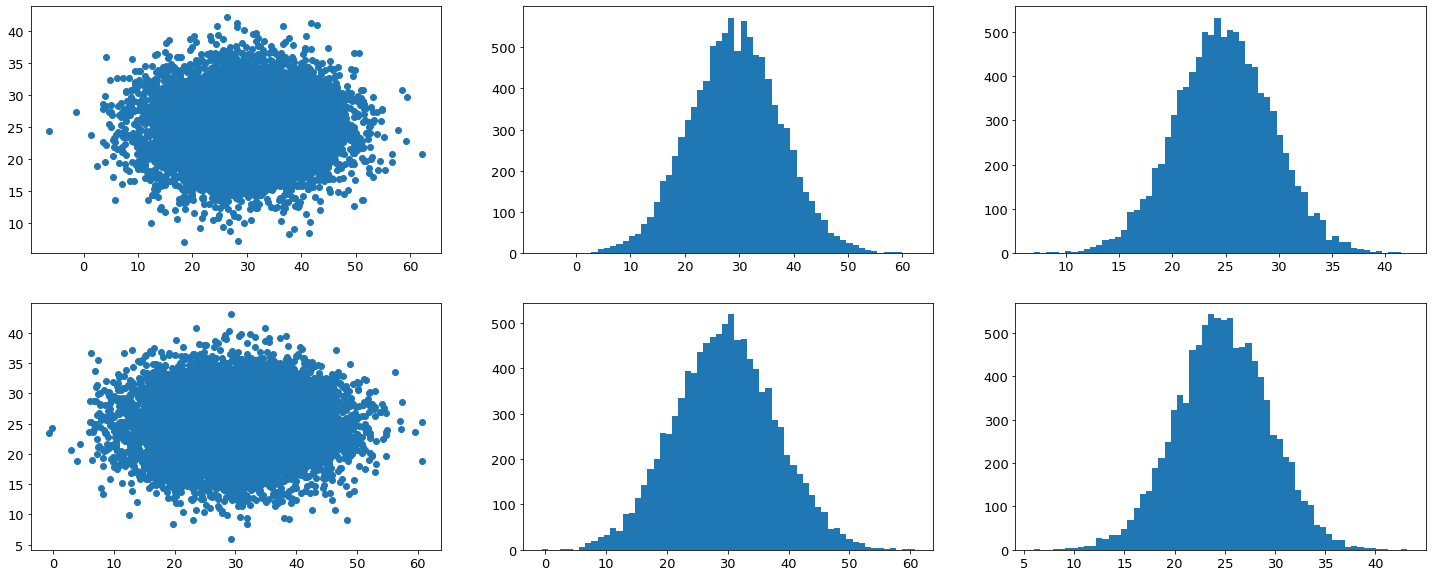

8.32029904253989
8.301150097266879
4.568902355829749
4.617268481006075


In [9]:

'''This fuction returns a multivariate normal array'''
rng = np.random.default_rng(100)
    #variances = np.square(std_devs) 
    #covariance_one = corr_coeff[0] * (std_devs[0] * std_devs[1]) 
    #covariance_two = corr_coeff[1] * (std_devs[2] * std_devs[3]) 
    
'''
mean = (45.4 ,67.3 ,164.7 ,29.4 ,127.7,78.8, 24.8)
covariance_matrix = [
    [1,     0.36, -0.23, 0.63,  0.46,  0.33, 0.44],
    [0.36,  1   ,  0.2,  0.73,  0.37,  0.36, 0.91],
    [-0.23, 0.2 ,  1,   -0.25, -0.00,  0.02,-0.16],
    [0.63,  0.73, -0.25, 1     ,0.39,  0.32, 0.81],
    [0.46,  0.37, -0.00, 0.39,  1,     0.7,  0.37],
    [0.33,  0.36,  0.02, 0.32,  0.7,   1,    0.35],
    [0.44,  0.91, -0.16, 0.81,  0.37,  0.35, 1]]
    '''

# fat%, BMI after 
mean = (29.4, 24.8) 
var1 = np.square(8.3)
var2 = np.square(4.6)
cor = 0.2

#covariance_matrix = [[np.square(8.3+4.6), 1], [1, np.square(4.6+8.3)]] 
covariance_matrix = [[var1, cor], [cor, var2]] 
multi_array = rng.multivariate_normal(mean, covariance_matrix, 10000)
fat_normal = rng.normal(29.4, 8.3, 10000)
bmi_normal = rng.normal(24.8, 4.6, 10000)

fig, ax = plt.subplots(2, 3, figsize = (25, 10), sharex = False, sharey = False)
ax[0, 0].scatter(multi_array[:,0], multi_array[:,1])
ax[0, 1].hist((multi_array[:,0]), bins = 60)
ax[0, 2].hist((multi_array[:,1]), bins = 60)

ax[1, 0].scatter(fat_normal, bmi_normal)
ax[1, 1].hist(fat_normal, bins = 60)
ax[1, 2].hist(bmi_normal, bins = 60)
plt.show()

print(np.std(multi_array[:,0]))
print(np.std(fat_normal))
print(np.std(multi_array[:,1]))
print(np.std(bmi_normal))

In [10]:
'''
Table 1
Basic sample characteristics – men.

Variable	Count	Mean	Standard deviation
BMI	120	26.8	3.9
Weight [kg]	120	84.4	13.2
Fat percentage	120	23.3	7.0
Age [years]	120	46.1	16.6
Height [cm]	120	176.9	7.6
BPs [mmHg]	120	133.1	17.0
BPd [mmHg]	120	82.5	11.6
BMI – Body Mass Index [kg/m2]; Fat percentage – percentage of total body fat [%]; BPs – systolic blood pressure; BPd – diastolic blood pressure.
''';

## References
[X] CDC, 2021, High Blood Pressure Symptoms and Causes, Available at:<br>
[Ref X](https://www.cdc.gov/bloodpressure/about.htm) (Accessed 08 December 2021).<br>

<br>

[X]. Singh, S, 2019, Getting the Basics of Correlation & Covariance, Available at:<br>
[Ref X](https://towardsdatascience.com/getting-the-basics-of-correlation-covariance-c8fc110b90b4) (Accessed 07 December 2021).


<br>

Justin, B, et al. (2013), Risk Models to Predict Hypertension: A Systematic Review, Plos One, Availabile at:<br>
[Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3702558/) (Accessed 08 December 2021).

<br>

Glen, S, 2021, What is a C-Statistic?, Statistics How To, Available at: <br>
[Ref X](https://www.statisticshowto.com/c-statistic/) (Accessed 09 December 2021).


<br>



<br>



<br>



<br>



<br>



<br>



<br>



<br>



<br>
